In [ ]:
# Step 1: Install spaCy (if not already installed)
# !pip install spacy
# !python -m spacy download en_core_web_sm

import spacy

# Step 2: Load the pre-trained English NER model
nlp = spacy.load("en_core_web_sm")

# Step 3: Provide a sample text for NER
text = "Barack Obama was born in Honolulu and was the President of the United States."

# Step 4: Process the text using the NLP pipeline
doc = nlp(text)

# Step 5: Extract and display the named entities
print("Named Entities, their labels, and positions in the text:\n")
for ent in doc.ents:
    print(f"Entity: {ent.text}, Label: {ent.label_}, Start: {ent.start_char}, End: {ent.end_char}")


Named Entities, their labels, and positions in the text:

Entity: Barack Obama, Label: PERSON, Start: 0, End: 12
Entity: Honolulu, Label: GPE, Start: 25, End: 33
Entity: the United States, Label: GPE, Start: 59, End: 76


In [ ]:
#Sample code:

from sklearn.feature_extraction.text import CountVectorizer

# Sample data (text samples)
samples = [
    "The AI School is an online school.",
    "The online AI School brings a lot of knowledge."
]

# Using CountVectorizer with max_features=10
vectorizer = CountVectorizer(binary=True, max_features=10)  # Only keep top 10 words
X = vectorizer.fit_transform(samples).toarray()  # Convert to numpy array

# Output the one-hot encoded result
print("One-Hot Encoded Output:")
print(X)

# Output the feature names (words)
print("\nFeature Names (Top 10 words):")
print(vectorizer.get_feature_names_out())


One-Hot Encoded Output:
[[1 1 0 1 0 0 0 1 1 1]
 [1 0 1 0 1 1 1 1 1 1]]

Feature Names (Top 10 words):
['ai' 'an' 'brings' 'is' 'knowledge' 'lot' 'of' 'online' 'school' 'the']


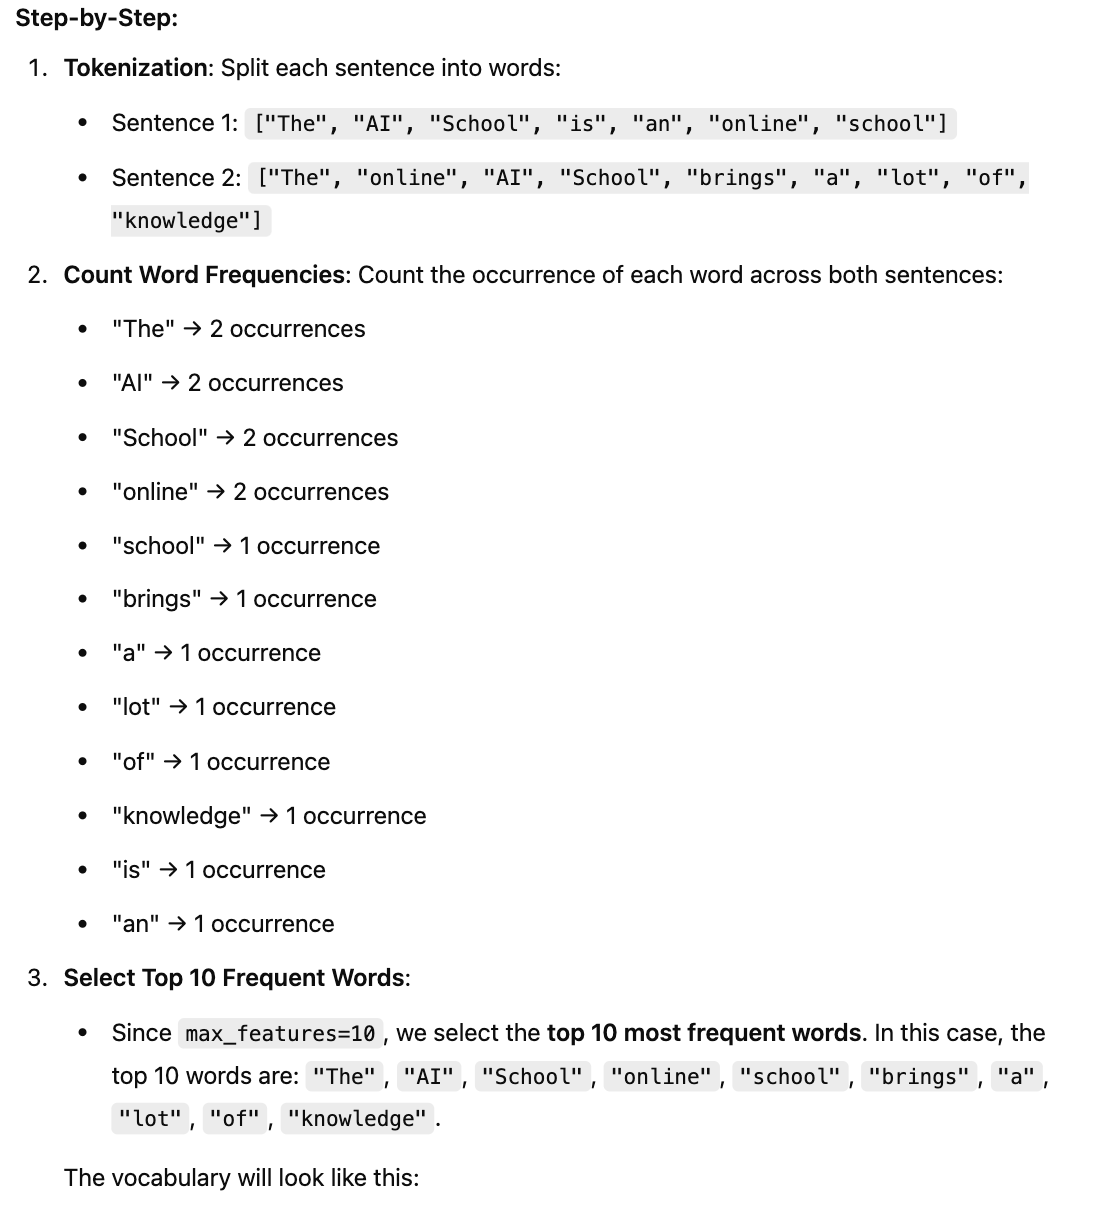

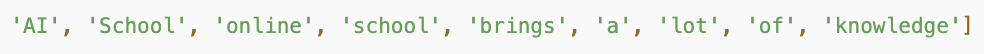

### 1. Word-level one-hot encoding

In [ ]:
# Importing necessary library
import numpy as np

# Initializing samples for tokenization
samples = ['The AI School is an online school.', 'The online AI School brings lot of knowledge.']

# Building token index for unique words
token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

# Setting maximum sequence length
max_length = 10

# Initializing results tensor for one-hot encoding
results = np.zeros(shape=(len(samples),
                          max_length,
                          max(token_index.values()) + 1))

# Encoding samples based on token index
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1


In [ ]:
token_index

{'The': 1,
 'AI': 2,
 'School': 3,
 'is': 4,
 'an': 5,
 'online': 6,
 'school.': 7,
 'brings': 8,
 'lot': 9,
 'of': 10,
 'knowledge.': 11}

In [ ]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0.,

### 2. Character-level one-hot encoding

In [ ]:
# Importing necessary library
import numpy as np
import string

# Initializing samples for character tokenization
samples = ['The AI School is an online school.', 'The online AI School brings is an ML school.']

# Generating token index for printable characters
characters = string.printable
token_index = dict(zip(range(1, len(characters) + 1), characters))

# Setting maximum sequence length
max_length = 50

# Initializing results tensor for one-hot encoding
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))

# Encoding samples based on character token index
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.


In [ ]:
results

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
print(len(token_index))
display(token_index)

100


{1: '0',
 2: '1',
 3: '2',
 4: '3',
 5: '4',
 6: '5',
 7: '6',
 8: '7',
 9: '8',
 10: '9',
 11: 'a',
 12: 'b',
 13: 'c',
 14: 'd',
 15: 'e',
 16: 'f',
 17: 'g',
 18: 'h',
 19: 'i',
 20: 'j',
 21: 'k',
 22: 'l',
 23: 'm',
 24: 'n',
 25: 'o',
 26: 'p',
 27: 'q',
 28: 'r',
 29: 's',
 30: 't',
 31: 'u',
 32: 'v',
 33: 'w',
 34: 'x',
 35: 'y',
 36: 'z',
 37: 'A',
 38: 'B',
 39: 'C',
 40: 'D',
 41: 'E',
 42: 'F',
 43: 'G',
 44: 'H',
 45: 'I',
 46: 'J',
 47: 'K',
 48: 'L',
 49: 'M',
 50: 'N',
 51: 'O',
 52: 'P',
 53: 'Q',
 54: 'R',
 55: 'S',
 56: 'T',
 57: 'U',
 58: 'V',
 59: 'W',
 60: 'X',
 61: 'Y',
 62: 'Z',
 63: '!',
 64: '"',
 65: '#',
 66: '$',
 67: '%',
 68: '&',
 69: "'",
 70: '(',
 71: ')',
 72: '*',
 73: '+',
 74: ',',
 75: '-',
 76: '.',
 77: '/',
 78: ':',
 79: ';',
 80: '<',
 81: '=',
 82: '>',
 83: '?',
 84: '@',
 85: '[',
 86: '\\',
 87: ']',
 88: '^',
 89: '_',
 90: '`',
 91: '{',
 92: '|',
 93: '}',
 94: '~',
 95: ' ',
 96: '\t',
 97: '\n',
 98: '\r',
 99: '\x0b',
 100: '\x0c'

### 3. Using Keras for word-level one-hot encoding

In [ ]:
# Importing necessary library
from tensorflow.keras.preprocessing.text import Tokenizer

# Initializing samples for tokenization
samples = ['The AI School is an online school.', 'The online AI School brings is an ML school.']

# Creating tokenizer object and fitting it on samples
tokenizer = Tokenizer(num_words=10)  # nornally we make it big enough to cover corpus vocab
tokenizer.fit_on_texts(samples)

# Converting samples to sequences of tokens
sequences = tokenizer.texts_to_sequences(samples)

# Generating one-hot encoded results based on tokenizer
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# Retrieving word index from tokenizer
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 8 unique tokens.


In [ ]:
sequences

[[2, 3, 1, 4, 5, 6, 1], [2, 6, 3, 1, 7, 4, 5, 8, 1]]

In [ ]:
word_index

{'school': 1,
 'the': 2,
 'ai': 3,
 'is': 4,
 'an': 5,
 'online': 6,
 'brings': 7,
 'ml': 8}

In [ ]:
one_hot_results

array([[0., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.]])

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Initializing samples for tokenization
samples = ['The AI School is an online school.', 'The online AI School brings is an ML school.']

# Creating tokenizer object and fitting it on samples
tokenizer = Tokenizer(num_words=10)  # normally we make it big enough to cover corpus vocab
tokenizer.fit_on_texts(samples)

# Converting samples to sequences of tokens
sequences = tokenizer.texts_to_sequences(samples)

# Generating one-hot encoded results based on tokenizer
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# Retrieving word index from tokenizer
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Printing the one-hot encoded results

print('One-hot encoded (binary) results:\n', one_hot_results)


Found 8 unique tokens.
One-hot encoded (binary) results:
 [[0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]]


In [ ]:
# Create one-hot encoding for each word
vocab_size = len(word_index) + 1  # +1 for padding token if any
one_hot_matrix = np.eye(vocab_size)

# Dictionary to map words to their one-hot encoded vectors
one_hot_dict = {word: one_hot_matrix[idx] for word, idx in word_index.items()}

# Displaying the one-hot encodings for each word
print("One-hot encodings for each word:")
for word, encoding in one_hot_dict.items():
    print(f"{word}: {encoding}")


One-hot encodings for each word:
school: [0. 1. 0. 0. 0. 0. 0. 0. 0.]
the: [0. 0. 1. 0. 0. 0. 0. 0. 0.]
ai: [0. 0. 0. 1. 0. 0. 0. 0. 0.]
is: [0. 0. 0. 0. 1. 0. 0. 0. 0.]
an: [0. 0. 0. 0. 0. 1. 0. 0. 0.]
online: [0. 0. 0. 0. 0. 0. 1. 0. 0.]
brings: [0. 0. 0. 0. 0. 0. 0. 1. 0.]
ml: [0. 0. 0. 0. 0. 0. 0. 0. 1.]
